In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    """Train and evaluate model with multiple metrics"""

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

    return metrics, model


In [3]:
def plot_feature_importance(model, feature_names):
    """Plot feature importance"""
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance in Gradient Boosting Model")
    plt.bar(range(len(importance)), importance[indices])
    plt.xticks(range(len(importance)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [4]:
def plot_confusion_matrix(y_true, y_pred):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


In [6]:
df = pd.read_csv("full_processed_heart_disease_cleveland.csv")

X = df.drop(["target"],axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [7]:
baseline_model = GradientBoostingClassifier(random_state=42)
baseline_metrics, trained_baseline_model = train_evaluate_model(baseline_model, X_train, X_test, y_train, y_test)
print("\nBaseline Model Metrics:")
for metric, value in baseline_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")


Baseline Model Metrics:
Accuracy: 0.8525
Precision: 0.8710
Recall: 0.8438
F1: 0.8571


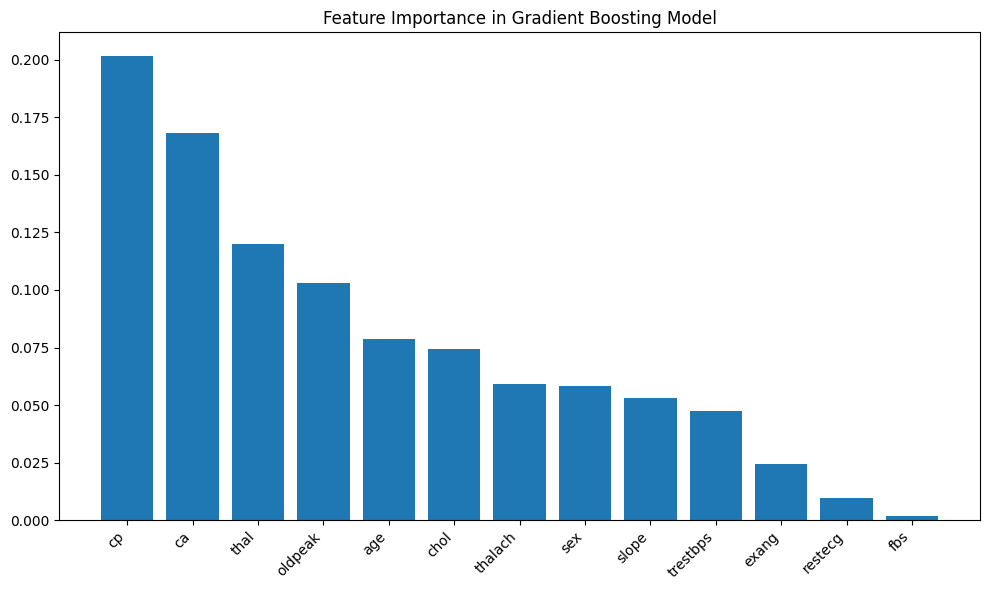

In [8]:
feature_names = X.columns
plot_feature_importance(trained_baseline_model, feature_names)

In [9]:
#Define hyperparameter grid
param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2, 0.5],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'subsample': [0.6, 0.8, 1.0]
    }

In [10]:
#Perform Grid Search
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
    )

grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.6}
Best Cross-Validation Score: 0.7987429707338174


In [13]:
#Evaluate optimized model
optimized_model = GradientBoostingClassifier(
    **grid_search.best_params_,random_state=42
    )


optimized_metrics, trained_optimized_model = train_evaluate_model(optimized_model, X_train, X_test, y_train, y_test)



In [14]:
print("\nOptimized Model Metrics:")
for metric, value in optimized_metrics.items():
  print(f"{metric.capitalize()}: {value:.4f}")


Optimized Model Metrics:
Accuracy: 0.8689
Precision: 0.9286
Recall: 0.8125
F1: 0.8667


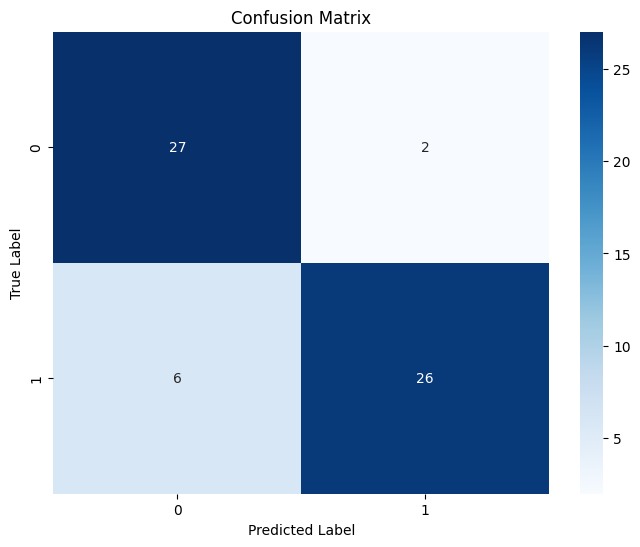

In [15]:
#confusion matrix for optimized model
y_pred = trained_optimized_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred)
